In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
names = 'Name1 Surname1, Name2 Surname2'
# разделяем строку на отдельные имена и удаляем лишние пробелы
names_list = [name.strip() for name in names.split(',')]
# выводим полученный список
print(names_list)

['Name1 Surname1', 'Name2 Surname2']


In [7]:
# Данные для создания DataFrame
data = {
    'client_id': np.random.randint(1,1000,30),
    'sex': np.random.choice([0,1],30),
    'wealth': np.random.choice(['low', 'medium','high'],30),
    'age': np.random.randint(20,70,30),
}

# Создание DataFrame
df = pd.DataFrame(data)

df.head()


,client_id,sex,wealth,age
0,136,1,medium,60
1,193,0,low,68
2,534,0,low,39
3,981,0,medium,44
4,960,0,high,26


In [9]:
medium_35 = df.loc[(df.wealth=='medium') & (df.age>35)]

In [10]:
medium_35

,client_id,sex,wealth,age
0,136,1,medium,60
3,981,0,medium,44
10,509,1,medium,57
12,935,0,medium,65
14,663,0,medium,50
16,450,1,medium,40
17,458,1,medium,58
20,809,0,medium,53
21,684,0,medium,60


In [18]:
# Данные для создания DataFrame
data = {
    'Клиент id': np.random.randint(1,1000,30),
    'Пол': np.random.choice([0,1],30),
    'Благосостояние': np.random.choice(['low', 'medium','high'],30),
    'Возраст': np.random.randint(20,70,30),
}

# Создание DataFrame
df = pd.DataFrame(data)

df.head()

,Клиент id,Пол,Благосостояние,Возраст
0,209,1,high,28
1,812,1,medium,56
2,859,1,low,55
3,205,0,medium,43
4,713,1,low,69


In [19]:
rename_cols  = {'Клиент id': 'client_id', 'Пол': 'sex', 'Благосостояние': 'wealth',  'Возраст': 'age'}
df = df.rename(columns=rename_cols)
df.head()

,client_id,sex,wealth,age
0,209,1,high,28
1,812,1,medium,56
2,859,1,low,55
3,205,0,medium,43
4,713,1,low,69


In [20]:
df['older_than_30'] = df.age>30

In [21]:
df.head()

,client_id,sex,wealth,age,older_than_30
0,209,1,high,28,False
1,812,1,medium,56,True
2,859,1,low,55,True
3,205,0,medium,43,True
4,713,1,low,69,True


In [23]:
df['older_than_30'].value_counts()

,count
older_than_30,
True,27
False,3


In [24]:
unique_num = df.nunique()

In [25]:
unique_num

,0
client_id,30
sex,2
wealth,3
age,22
older_than_30,2


In [26]:
data = pd.DataFrame({
    'client_id': df.client_id.sample(10).values,
    'amounts': np.random.randint(1000,10000,10),
    'date': np.random.randint(1573838,15983883,10)
})

data.head()

,client_id,amounts,date
0,620,2280,5512768
1,108,7203,10593510
2,859,4573,13666030
3,753,4846,2672472
4,465,7950,15298708


In [27]:
full_data = data.merge(df, on='client_id')

In [28]:
full_data

,client_id,amounts,date,sex,wealth,age,older_than_30
0,620,2280,5512768,1,low,32,True
1,108,7203,10593510,0,high,41,True
2,859,4573,13666030,1,low,55,True
3,753,4846,2672472,1,medium,35,True
4,465,7950,15298708,0,high,59,True
5,85,2277,15487646,0,medium,45,True
6,812,6212,14429223,1,medium,56,True
7,303,9607,8472584,0,medium,38,True
8,205,6573,9429835,0,medium,43,True
9,603,1380,6222447,1,low,25,False


In [30]:
# Монтируем Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Читаем файл с указанием кодировки
path = '/content/drive/My Drive/2Продвинутый pandas и знакомство с визуализацией на Python/3_companies.csv'
df = pd.read_csv(
    path,
    sep=';'
)

df.head()

Mounted at /content/drive


,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [31]:
def read_n_agg(path):
    df = pd.read_csv(path, sep=';')
    agg_df = df.groupby('company', as_index=True).agg({'income':'mean'})
    return agg_df

In [32]:
mean_income = read_n_agg(path)

In [33]:
mean_income.head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


In [34]:
# Читаем файл с указанием кодировки
path = '/content/drive/My Drive/2Продвинутый pandas и знакомство с визуализацией на Python/3_taxi_peru.csv'
taxi = pd.read_csv(
    path,
    delimiter=';', parse_dates=['start_at', 'end_at', 'arrived_at']
)

taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [35]:
taxi.source.value_counts()

,count
source,
iPhone,9741
web,7631
Android,4909
iPad,571
Wap,136


In [36]:
np.round(taxi.source.value_counts()/len(taxi)*100)

,count
source,
iPhone,42.0
web,33.0
Android,21.0
iPad,2.0
Wap,1.0


In [48]:
taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() # сбрасываем индекс
               .rename({'index':'source', 'source':'cnt'}, axis='columns')  # меняем значения на читаемые
              )
taxi_counts.head()

,cnt,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


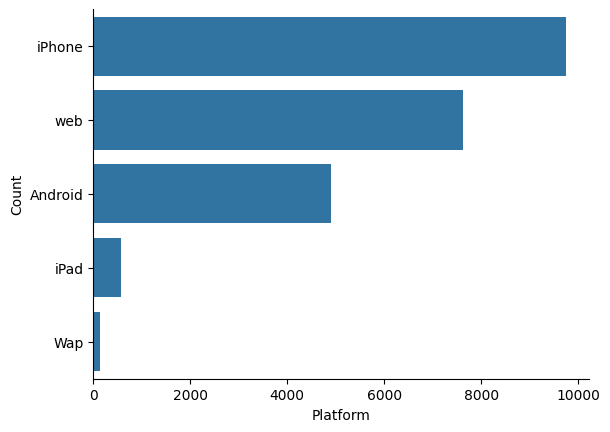

In [49]:
ax = sns.barplot(x='count', y='cnt', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

In [45]:
print(taxi_counts.columns)

Index(['cnt', 'count'], dtype='object')


<Axes: xlabel='count', ylabel='source'>

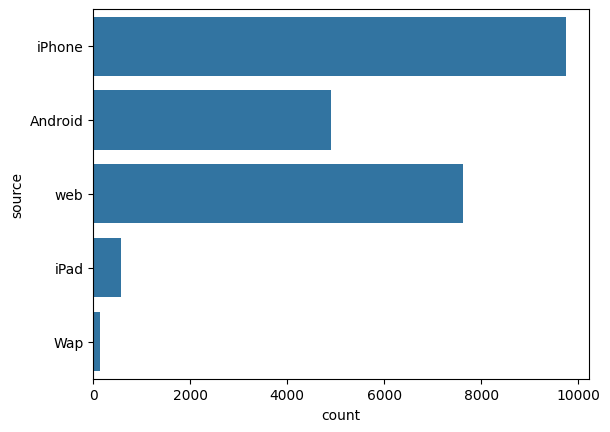

In [50]:
sns.countplot(taxi['source'])

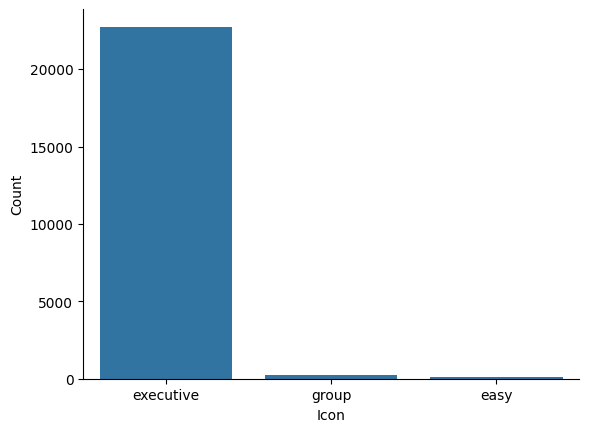

In [51]:
a = sns.countplot(x='icon', data=taxi)  # строим и записываем в переменную
a.set(xlabel='Icon', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

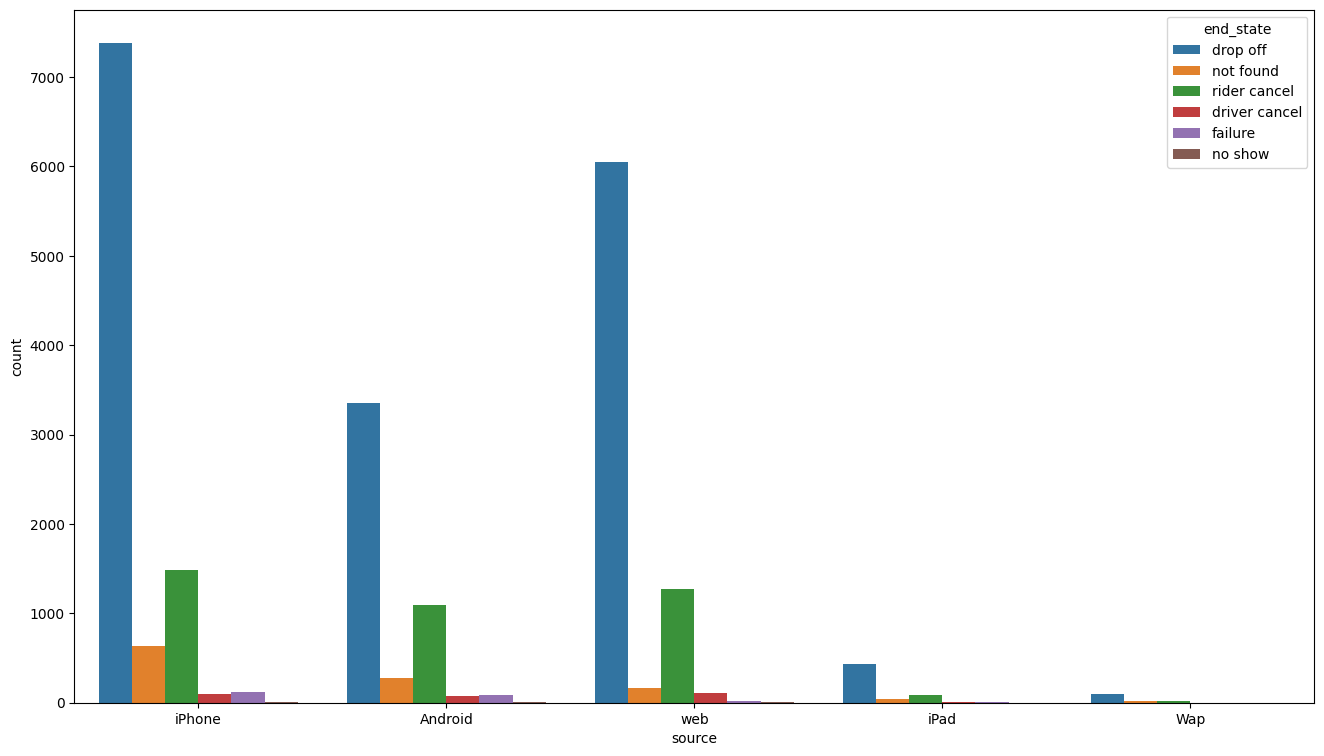

In [52]:
plt.figure(figsize=(16,9))  # указываем размер графика, чтобы он был побольше
sns.countplot(data=taxi, hue='end_state', x='source')  # строим график с нужными параметрами
plt.show()

In [61]:
scores = taxi.driver_score.value_counts(normalize=True).mul(100).round(2)

In [62]:
scores

,proportion
driver_score,
5.0,58.81
4.0,21.88
0.0,14.30
3.0,2.97
1.0,1.23
2.0,0.81


In [56]:
scores = scores.reset_index()

In [57]:
scores

,driver_score,proportion
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [60]:
scores = scores.rename(columns={'driver_score': 'percentage', 'index': 'driver_score'})
scores

,percentage,proportion
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [59]:
dsc = scores.sort_values('driver_score')
dsc

KeyError: 'driver_score'

In [63]:
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

NameError: name 'driver_score' is not defined